Epoch 1/20
38/38 [==============================] - 2s 9ms/step - loss: 0.0050 - val_loss: 0.0013
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 6.6565e-04 - val_loss: 9.0968e-04
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 5.7691e-04 - val_loss: 7.2486e-04
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 4.4826e-04 - val_loss: 5.2900e-04
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 3.3534e-04 - val_loss: 9.3981e-04
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 2.8177e-04 - val_loss: 5.3959e-04
Epoch 7/20
38/38 [==============================] - 0s 5ms/step - loss: 2.5432e-04 - val_loss: 2.9365e-04
Epoch 8/20
38/38 [==============================] - 0s 5ms/step - loss: 2.1395e-04 - val_loss: 2.9235e-04
Epoch 9/20
38/38 [==============================] - 0s 5ms/step - loss: 2.0214e-04 - val_loss: 2.8249e-04
Epoch 10/20
38/38 [==============================] - 0

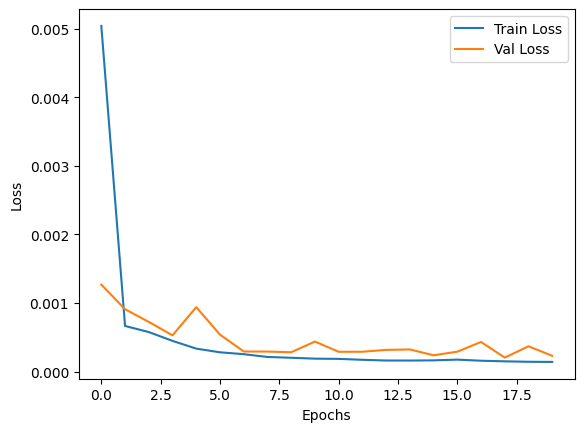

19/19 [==============================] - 0s 2ms/step


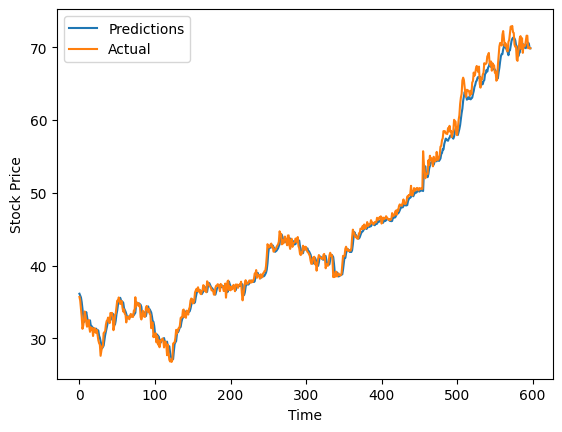

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Load your stock market data or any financial dataset
# For demonstration, let's assume you have a CSV file named 'stock_data.csv' containing historical stock prices
# Make sure the CSV file contains columns like 'Open', 'High', 'Low', 'Close', and 'Volume'

# Load the data
data = pd.read_csv('stock_data.csv')

# Preprocess the data
# For demonstration, let's consider using 'Close' prices for prediction
# You can choose other features or perform feature engineering as needed

# Select 'Close' prices
prices = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Define a function to create input-output sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length (number of time steps to look back)
seq_length = 30

# Create input-output sequences
X, y = create_sequences(prices_scaled, seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(seq_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the predictions vs actual values
plt.plot(predictions, label='Predictions')
plt.plot(y_test_inv, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


19/19 [==============================] - 0s 2ms/step
MAE: 0.011073291614674715, MSE: 0.00023019061449092452, RMSE: 0.015172033960248195


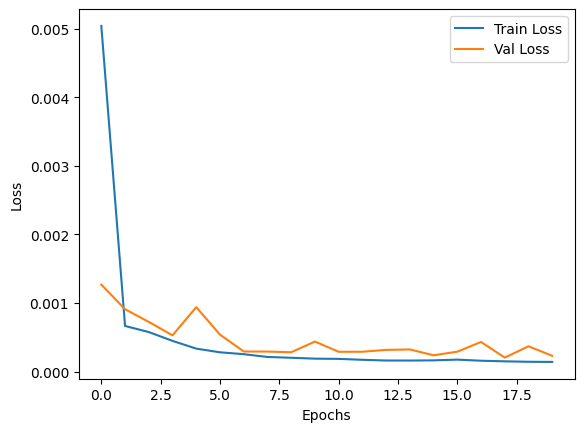

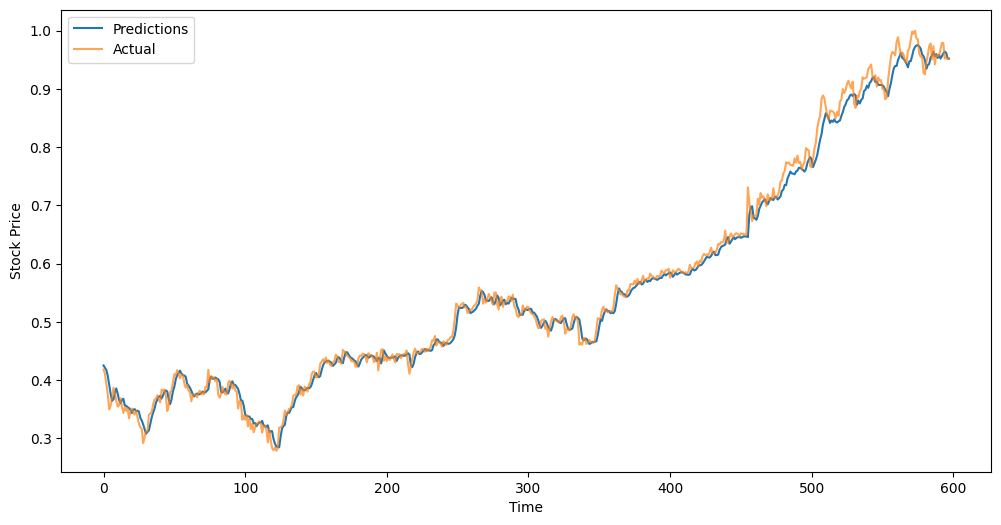

In [ ]:


# Calculate additional evaluation metrics
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Plot training history (including validation metrics)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 44.20776931816917
Mean Squared Error (MSE): 2102.9704255283687


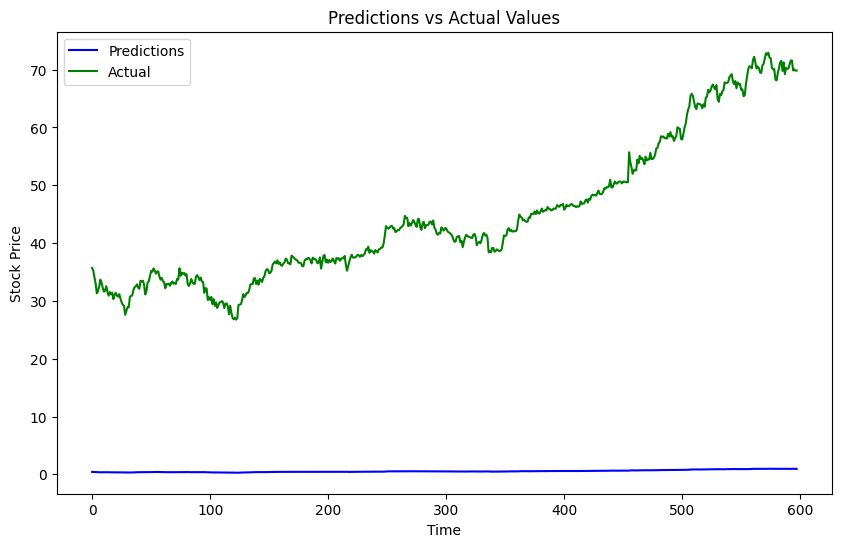

In [ ]:
mae = mean_absolute_error(y_test_inv, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_inv, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Predictions', color='blue')
plt.plot(y_test_inv, label='Actual', color='green')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


19/19 [==============================] - 0s 2ms/step


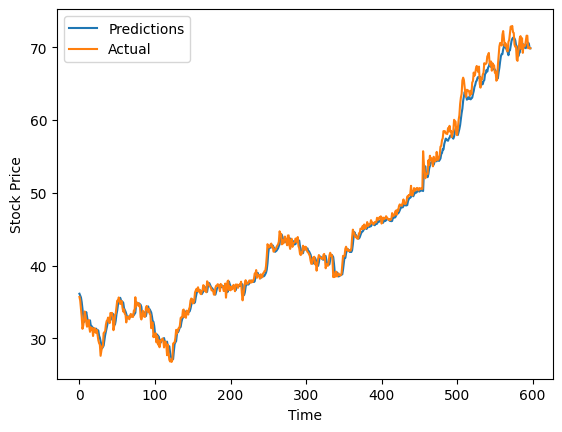

Predicted Stock Prices:
36.13024
35.877014
35.62006
34.977825
34.028805
33.024807
32.24525
32.396282
33.112846
33.609837
33.02534
32.321526
31.96946
32.356117
32.47246
31.730246
31.69457
31.540306
31.448378
31.250584
30.904554
31.267595
31.334766
31.0863
31.164007
31.052841
30.35846
30.08322
29.630856
29.111532
28.62633
28.824903
28.988838
29.717352
30.423677
30.9381
31.380434
32.039047
32.404785
32.71797
32.767246
32.49178
32.86412
33.2267
33.393505
33.261944
32.431004
31.880222
32.411854
33.2892
33.807266
34.60925
35.06132
35.345383
35.56864
35.224617
35.093197
35.025246
34.896694
34.14614
33.911175
33.68468
33.356792
32.97607
32.723534
32.94204
33.043766
32.93328
32.99625
33.08523
33.26544
33.15776
33.182026
33.35784
33.520805
34.620834
34.916046
34.655712
34.675385
34.800407
34.690998
34.61476
34.316505
33.244728
33.169167
33.344383
33.584927
33.157528
33.052593
33.55731
34.16865
34.387474
33.98528
33.994587
33.769936
33.55752
33.022923
32.2898
32.26599
31.712227
30.739166
30.60036

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

# Plot the predictions vs actual values
plt.plot(predictions, label='Predictions')
plt.plot(y_test_inv, label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the predicted stock prices
print("Predicted Stock Prices:")
for price in predictions:
    print(price[0])


In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {loss}')

# Calculate Mean Absolute Error (MAE)
predictions_scaled = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions_scaled)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions_scaled)
print(f'Mean Squared Error (MSE): {mse}')


Test Loss (MSE): 0.00023019059153739363
19/19 [==============================] - 0s 4ms/step
Mean Absolute Error (MAE): 0.011073291614674715
Mean Squared Error (MSE): 0.00023019061449092452
